In [1]:
import numpy as np
import pdb,time
import functools
import numpy as np
import pdb
import h5py
%matplotlib inline

def timeit(func):
    @functools.wraps(func)
    def wrapper(*args):
        start = time.clock()
        result =  func(*args)
        end =time.clock()
        print ('-USED:', func.__name__,end - start,'/s'  )
        return result
    return wrapper


In [2]:

N = 240
days = 256*5
Days = days
ticker = 3000
Dtype = np.float64

In [6]:

def make_data(N,chunk_days=1):
    arr1 = np.random.normal(size=(N*chunk_days,ticker) )
    arr2 = np.random.normal(size=(days*N,ticker) )
    start = time.clock()
    for i in range(int(days/chunk_days)):
        np.save('./data/temp_%d_chunk%d_%d.npy'%(N,chunk_days,i), arr1)
    #     arr1.tofile(outfile)
        print('./data/temp_%d_chunk%d_%d.npy'%(N,chunk_days,i),arr1.shape)
    # arr2.tofile('./data/panel_%d.bin'%n)
    np.save('./data/panel_%d.npy'%N, arr2)
    end = time.clock()
    print ("make data %d-time %d-date %d-ticker %f/s"%(N,days,ticker,round((end-start),2)))

    
def make_data_bin(N,chunk_days=1):
    arr1 = np.random.normal(size=(N*chunk_days,ticker) )
    arr2 = np.random.normal(size=(days*N,ticker) )
    #pdb.set_trace()
    start = time.clock()
    for i in range(int(days/chunk_days)):
        outfile = './data/temp_%d_chunk%d_%d.bin'%(N,chunk_days,i)
#         np.save('./data/temp_%d_%d.npy'%(N,i), arr1)
        arr1.tofile(outfile)
    #     print(outfile)
    arr2.tofile('./data/panel_%d.bin'%N)
#     np.save('./data/panel_%d.npy'%N, arr2)
    end = time.clock()
    print ("make data %d-time %d-date %d-ticker %f/s"%(N,days,ticker,round((end-start),2)))
    
def make_data_hdf5_perfile(freq=1,chunk_days=1):
    arr1 = np.random.normal(size=(freq*chunk_days,ticker))
    arr2 = np.random.normal(size=(days*freq,ticker))
    start = time.clock()
    for i in range(int(days/chunk_days)):
        outfile = './data/temp_%d_chunk%d_%d.hdf5'%(freq,chunk_days,i)
#         np.save('./data/temp_%d_%d.npy'%(N,i), arr1)
        h5f = h5py.File(outfile, 'w')
        h5f.create_dataset('arr', data = arr1)
        h5f.close()
    end = time.clock()
    print ("make data %d-time %d-date %d-ticker %f/s"%(N,days,ticker,round((end-start),2)))
    
def read_data_hdf5_perfile(freq=1,chunk_days=1):
    start = time.clock()
    for i in range(int(days/chunk_days)):
        outfile = './data/temp_%d_chunk%d_%d.hdf5'%(freq,chunk_days,i)
        h5f = h5py.File(outfile, 'r')
        arr = h5f['arr'][:]
        h5f.close()
    end = time.clock()
    return end - start
    
def make_data_hdf5_in_onefile(freq=1,chunck_size=1):
    arr_oneday = np.random.normal(size=(freq*chunck_size,ticker))
    arr2 = np.random.normal(size=(days*freq,ticker))
    #pdb.set_trace()
    start = time.clock()
    outfile = './data/temp_bars%d_chuncksize%d.hdf5'%(freq,chunck_size)
    h5f = h5py.File(outfile, 'w')
    for i in range(int(days/chunck_size)):
        h5f.create_dataset('chunck_%s'%i, data = arr_oneday)
    h5f.close()
    
    h5f = h5py.File('./data/panel_bars%s.hdf5'%freq, 'w')
    h5f.create_dataset('panel', data = arr2)
    h5f.close()
#     np.save('./data/panel_%d.npy'%N, arr2)
    end = time.clock()
    print ("make data %d-bar %d-date %d-ticker %f/s"%(freq,days,ticker,round((end-start),2)))
    
def read_data_hdf5_chunck_in_onefile(freq=1,chunck_size=1):
    start = time.clock()
    outfile = './data/temp_bars%d_chuncksize%d.hdf5'%(freq,chunck_size)
    h5f = h5py.File(outfile, 'r')
    for i in range(int(days/chunck_size)):
        arr = h5f['chunck_%s'%i][:]
    h5f.close()
    end = time.clock()
    return end - start

def read_data_hdf5_chunck_in_onefile_concat(freq=1,chunck_size=1):
    start = time.clock()
    arr_panel = np.full((freq*Days,ticker),fill_value = np.nan , dtype=Dtype)
    outfile = './data/temp_bars%d_chuncksize%d.hdf5'%(freq,chunck_size)
    h5f = h5py.File(outfile, 'r')
    for i in range(int(days/chunck_size)):
        arr_panel[(i)*freq*chunck_size:(i+1)*freq*chunck_size,:] = h5f['chunck_%s'%i][:]
    h5f.close()
    end = time.clock()
    return end - start

def read_data_hdf5_panel_in_onefile(freq=1):
    start = time.clock()
    h5f = h5py.File('./data/panel_bars%s.hdf5'%freq, 'r')
    arr = h5f['panel'][:]
    h5f.close()
    end = time.clock()
    return end - start
    

In [7]:
make_data_hdf5_in_onefile(freq=1,chunck_size=1)
make_data_hdf5_in_onefile(freq=240,chunck_size=1)
make_data_hdf5_in_onefile(freq=1,chunck_size=5)
make_data_hdf5_in_onefile(freq=240,chunck_size=5)

make_data_hdf5_perfile(freq=1,chunk_days=1)
make_data_hdf5_perfile(freq=240,chunk_days=1)
make_data_hdf5_perfile(freq=1,chunk_days=5)
make_data_hdf5_perfile(freq=240,chunk_days=5)

make data 1-bar 1280-date 3000-ticker 0.240000/s
make data 240-bar 1280-date 3000-ticker 17.110000/s
make data 1-bar 1280-date 3000-ticker 0.100000/s
make data 240-bar 1280-date 3000-ticker 19.090000/s
make data 240-time 1280-date 3000-ticker 0.610000/s
make data 240-time 1280-date 3000-ticker 8.270000/s
make data 240-time 1280-date 3000-ticker 0.190000/s
make data 240-time 1280-date 3000-ticker 7.180000/s


In [262]:
make_data_hdf5_perfile(freq=1,chunk_days=5)
make_data_hdf5_perfile(freq=240,chunk_days=5)

make data 1-time 1280-date 3000-ticker 0.150000/s
make data 1-time 1280-date 3000-ticker 6.960000/s


In [257]:
read_data_hdf5_chunck_in_onefile_concat(freq=1,chunck_size=1)

0.40700099999958184

In [265]:
N=1
print (read_data_hdf5_panel_in_onefile(freq=1))
print( read_data_hdf5_perfile(freq=1,chunk_days=1))
print( read_data_hdf5_perfile(freq=1,chunk_days=5))
print (read_data_hdf5_chunck_in_onefile(freq=1,chunck_size=1))
print (read_data_hdf5_chunck_in_onefile(freq=1,chunck_size=5))
print (read_data_hdf5_chunck_in_onefile_concat(freq=1,chunck_size=1))
print (read_data_hdf5_chunck_in_onefile_concat(freq=1,chunck_size=5))
print()
print (read_data_hdf5_panel_in_onefile(freq=240))
print( read_data_hdf5_perfile(freq=240,chunk_days=1))
print( read_data_hdf5_perfile(freq=240,chunk_days=5))
print (read_data_hdf5_chunck_in_onefile(freq=240,chunck_size=1))
print (read_data_hdf5_chunck_in_onefile(freq=240,chunck_size=5))
print (read_data_hdf5_chunck_in_onefile_concat(freq=240,chunck_size=1))
print (read_data_hdf5_chunck_in_onefile_concat(freq=240,chunck_size=5))

0.014347999999699823
0.6725950000000012
0.1356869999999617
0.3028969999995752
0.06913499999973283
0.3351860000002489
0.07756700000027195

4.510355999999774
2.1984599999996135
2.6281010000002425
2.118450999999368
2.595151000000442
7.836410000000797
8.753004999999575


In [5]:
print (read_data_hdf5_chunck_in_onefile(freq=1,chunck_size=1))
print (read_data_hdf5_panel_in_onefile(freq=1))
# print ()
# print (read_data_hdf5_chunck_in_onefile(freq=1,chunck_size=5))
# print (read_data_hdf5_panel_in_onefile(freq=5))

0.40589700000001017
0.01310000000000855


In [191]:
print (read_data_hdf5_chunck_in_onefile(freq=240,chunck_size=1))
print (read_data_hdf5_panel_in_onefile(freq=240))

2.504866999999649
4.390005000000201


In [142]:


# @timeit
def read_perday_once_npy():
    start = time.clock()
    for i in range(days):
        outfile = './data/temp_%d_%d.npy'%(N,i)
#        np.save(outfile, arr)
    #    arr1.tofile(outfile)
        arr = np.load(outfile)
    end = time.clock()
    return end - start

def read_perday_once_bin():
    start = time.clock()
    for i in range(days):
        outfile = './data/temp_%d_%d.bin'%(N,i)
#        np.save(outfile, arr)
    #    arr1.tofile(outfile)
        arr = np.fromfile(outfile,dtype=Dtype)
    end = time.clock()
    return end - start

def read_perday_once_hdf5():
    start = time.clock()
    for i in range(days):
        outfile = './data/temp_%d_%d.hdf5'%(N,i)
        h5f = h5py.File(outfile,'r')
        arr = h5f['arr'][:]
        h5f.close()
    end = time.clock()
    return end - start

# @timeit
def read_perday_rolling_npy(n):
    start = time.clock()
    arr_ = np.full((N*n,ticker),fill_value=np.nan,dtype=np.float64)
    for i in range(days):
        outfile = './data/temp_%d_%d.npy'%(N,i)
#        np.save(outfile, arr)
    #    arr1.tofile(outfile)
        arr = np.load(outfile)
        arr_[:(n-1)*N] = arr_[1*N:]
        arr_[(n-1)*N:] = arr
    end = time.clock()
    return end - start

def read_perday_rolling_hdf5(n):
    start = time.clock()
    arr_ = np.full((N*n,ticker),fill_value=np.nan,dtype=np.float64)
    for i in range(days):
        outfile = './data/temp_%d_%d.hdf5'%(N,i)
#        np.save(outfile, arr)
    #    arr1.tofile(outfile)
        h5f = h5py.File(outfile,'r')
        arr = h5f['arr'][:]
        h5f.close()
        arr_[:(n-1)*N] = arr_[1*N:]
        arr_[(n-1)*N:] = arr
    end = time.clock()
    return end - start

def read_perday_chunck_rolling_npy(n,chunk_days =1):
    start = time.clock()
    arr_ = np.full((N*n,ticker),fill_value=np.nan,dtype=np.float64)
    for i in range(int(days/chunk_days)):
        outfile = './data/temp_%d_chunk%d_%d.npy'%(N,chunk_days,i)
        arr = np.load(outfile)
        for i in range(n):
            arr_[:(n-1)*N] = arr_[1*N:]
            arr_[(n-1)*N:] = arr[N*(chunk_days-1):]
    end = time.clock()
    return end - start

def read_perday_chunck_rolling_hdf5(n,chunk_days =1):
    start = time.clock()
    arr_ = np.full((N*n,ticker),fill_value=np.nan,dtype=np.float64)
    for i in range(int(days/chunk_days)):
        outfile = './data/temp_%d_chunk%d_%d.hdf5'%(N,chunk_days,i)
        h5f = h5py.File(outfile,'r')
        arr = h5f['arr'][:]
        h5f.close()
        for i in range(n):
            arr_[:(n-1)*N] = arr_[1*N:]
            arr_[(n-1)*N:] = arr[N*(chunk_days-1):]
    end = time.clock()
    return end - start

# def read_perday_chunck_rolling_bin(n):
#     start = time.clock()
#     arr_ = np.full((N*n,ticker),fill_value=np.nan,dtype=np.float64)
#     for i in range(int(days/n)):
#         outfile = './data/temp_%d_%d.bin'%(N,i)
#         arr = np.fromfile(outfile,dtype=Dtype)
#         for i in range(n):
#             arr_[:(n-1)*N] = arr_[1*N:]
#             arr_[(n-1)*N:] = arr
#     end = time.clock()
#     return end - start
        
        
# @timeit
def read_sep_npy():
    
    for i in xrange(1000):
        outfile = './temp%d.npy'%i
#        np.save(outfile, arr)
    #    arr1.tofile(outfile)
        np.fromfile(outfile)
#        print outfile
# @timeit
def read_panel():
    start = time.clock()
    outfile = './data/panel_%d.npy'%(N)
    arr = np.load(outfile)
    end = time.clock()
    return end - start

# read_perday_once()
N = 240

# make_data(N)
# t1 = read_panel()
# t2 = read_perday_rolling(5)
# print (t1)
# print (t2)

# make_data_bin(N)
# t3 = read_perday_once_npy()
# t4 = read_perday_once_bin()
# t5 = read_panel()
# t6 = read_perday_chunck_rolling_npy(5,chunk_days=5)
# print (t3)
# print (t4)
# print (t5)
# print np.fromfile('./temp1.bin')
# print np.fromfile('./temp1.npy')
#np.fromfile('temp.bin', dtype=np.float64)

In [143]:
# make data
for N in range(1,241,20):
#     make_data(N)
#     make_data_bin(N)
#     make_data_hdf5(N)
    make_data(N,chunk_days=5)
    make_data_bin(N,chunk_days=5)
    make_data_hdf5(N,chunk_days=5)

./data/temp_1_chunk5_0.npy (5, 3000)
./data/temp_1_chunk5_1.npy (5, 3000)
./data/temp_1_chunk5_2.npy (5, 3000)
./data/temp_1_chunk5_3.npy (5, 3000)
./data/temp_1_chunk5_4.npy (5, 3000)
./data/temp_1_chunk5_5.npy (5, 3000)
./data/temp_1_chunk5_6.npy (5, 3000)
./data/temp_1_chunk5_7.npy (5, 3000)
./data/temp_1_chunk5_8.npy (5, 3000)
./data/temp_1_chunk5_9.npy (5, 3000)
./data/temp_1_chunk5_10.npy (5, 3000)
./data/temp_1_chunk5_11.npy (5, 3000)
./data/temp_1_chunk5_12.npy (5, 3000)
./data/temp_1_chunk5_13.npy (5, 3000)
./data/temp_1_chunk5_14.npy (5, 3000)
./data/temp_1_chunk5_15.npy (5, 3000)
./data/temp_1_chunk5_16.npy (5, 3000)
./data/temp_1_chunk5_17.npy (5, 3000)
./data/temp_1_chunk5_18.npy (5, 3000)
./data/temp_1_chunk5_19.npy (5, 3000)
./data/temp_1_chunk5_20.npy (5, 3000)
./data/temp_1_chunk5_21.npy (5, 3000)
./data/temp_1_chunk5_22.npy (5, 3000)
./data/temp_1_chunk5_23.npy (5, 3000)
./data/temp_1_chunk5_24.npy (5, 3000)
./data/temp_1_chunk5_25.npy (5, 3000)
./data/temp_1_chunk5_2

make data 1-time 1280-date 3000-ticker 0.180000/s
./data/temp_21_chunk5_0.npy (105, 3000)
./data/temp_21_chunk5_1.npy (105, 3000)
./data/temp_21_chunk5_2.npy (105, 3000)
./data/temp_21_chunk5_3.npy (105, 3000)
./data/temp_21_chunk5_4.npy (105, 3000)
./data/temp_21_chunk5_5.npy (105, 3000)
./data/temp_21_chunk5_6.npy (105, 3000)
./data/temp_21_chunk5_7.npy (105, 3000)
./data/temp_21_chunk5_8.npy (105, 3000)
./data/temp_21_chunk5_9.npy (105, 3000)
./data/temp_21_chunk5_10.npy (105, 3000)
./data/temp_21_chunk5_11.npy (105, 3000)
./data/temp_21_chunk5_12.npy (105, 3000)
./data/temp_21_chunk5_13.npy (105, 3000)
./data/temp_21_chunk5_14.npy (105, 3000)
./data/temp_21_chunk5_15.npy (105, 3000)
./data/temp_21_chunk5_16.npy (105, 3000)
./data/temp_21_chunk5_17.npy (105, 3000)
./data/temp_21_chunk5_18.npy (105, 3000)
./data/temp_21_chunk5_19.npy (105, 3000)
./data/temp_21_chunk5_20.npy (105, 3000)
./data/temp_21_chunk5_21.npy (105, 3000)
./data/temp_21_chunk5_22.npy (105, 3000)
./data/temp_21_ch

./data/temp_21_chunk5_246.npy (105, 3000)
./data/temp_21_chunk5_247.npy (105, 3000)
./data/temp_21_chunk5_248.npy (105, 3000)
./data/temp_21_chunk5_249.npy (105, 3000)
./data/temp_21_chunk5_250.npy (105, 3000)
./data/temp_21_chunk5_251.npy (105, 3000)
./data/temp_21_chunk5_252.npy (105, 3000)
./data/temp_21_chunk5_253.npy (105, 3000)
./data/temp_21_chunk5_254.npy (105, 3000)
./data/temp_21_chunk5_255.npy (105, 3000)
make data 21-time 1280-date 3000-ticker 1.520000/s
make data 21-time 1280-date 3000-ticker 1.170000/s
make data 21-time 1280-date 3000-ticker 1.330000/s
./data/temp_41_chunk5_0.npy (205, 3000)
./data/temp_41_chunk5_1.npy (205, 3000)
./data/temp_41_chunk5_2.npy (205, 3000)
./data/temp_41_chunk5_3.npy (205, 3000)
./data/temp_41_chunk5_4.npy (205, 3000)
./data/temp_41_chunk5_5.npy (205, 3000)
./data/temp_41_chunk5_6.npy (205, 3000)
./data/temp_41_chunk5_7.npy (205, 3000)
./data/temp_41_chunk5_8.npy (205, 3000)
./data/temp_41_chunk5_9.npy (205, 3000)
./data/temp_41_chunk5_10.np

./data/temp_41_chunk5_209.npy (205, 3000)
./data/temp_41_chunk5_210.npy (205, 3000)
./data/temp_41_chunk5_211.npy (205, 3000)
./data/temp_41_chunk5_212.npy (205, 3000)
./data/temp_41_chunk5_213.npy (205, 3000)
./data/temp_41_chunk5_214.npy (205, 3000)
./data/temp_41_chunk5_215.npy (205, 3000)
./data/temp_41_chunk5_216.npy (205, 3000)
./data/temp_41_chunk5_217.npy (205, 3000)
./data/temp_41_chunk5_218.npy (205, 3000)
./data/temp_41_chunk5_219.npy (205, 3000)
./data/temp_41_chunk5_220.npy (205, 3000)
./data/temp_41_chunk5_221.npy (205, 3000)
./data/temp_41_chunk5_222.npy (205, 3000)
./data/temp_41_chunk5_223.npy (205, 3000)
./data/temp_41_chunk5_224.npy (205, 3000)
./data/temp_41_chunk5_225.npy (205, 3000)
./data/temp_41_chunk5_226.npy (205, 3000)
./data/temp_41_chunk5_227.npy (205, 3000)
./data/temp_41_chunk5_228.npy (205, 3000)
./data/temp_41_chunk5_229.npy (205, 3000)
./data/temp_41_chunk5_230.npy (205, 3000)
./data/temp_41_chunk5_231.npy (205, 3000)
./data/temp_41_chunk5_232.npy (205

./data/temp_61_chunk5_163.npy (305, 3000)
./data/temp_61_chunk5_164.npy (305, 3000)
./data/temp_61_chunk5_165.npy (305, 3000)
./data/temp_61_chunk5_166.npy (305, 3000)
./data/temp_61_chunk5_167.npy (305, 3000)
./data/temp_61_chunk5_168.npy (305, 3000)
./data/temp_61_chunk5_169.npy (305, 3000)
./data/temp_61_chunk5_170.npy (305, 3000)
./data/temp_61_chunk5_171.npy (305, 3000)
./data/temp_61_chunk5_172.npy (305, 3000)
./data/temp_61_chunk5_173.npy (305, 3000)
./data/temp_61_chunk5_174.npy (305, 3000)
./data/temp_61_chunk5_175.npy (305, 3000)
./data/temp_61_chunk5_176.npy (305, 3000)
./data/temp_61_chunk5_177.npy (305, 3000)
./data/temp_61_chunk5_178.npy (305, 3000)
./data/temp_61_chunk5_179.npy (305, 3000)
./data/temp_61_chunk5_180.npy (305, 3000)
./data/temp_61_chunk5_181.npy (305, 3000)
./data/temp_61_chunk5_182.npy (305, 3000)
./data/temp_61_chunk5_183.npy (305, 3000)
./data/temp_61_chunk5_184.npy (305, 3000)
./data/temp_61_chunk5_185.npy (305, 3000)
./data/temp_61_chunk5_186.npy (305

./data/temp_81_chunk5_104.npy (405, 3000)
./data/temp_81_chunk5_105.npy (405, 3000)
./data/temp_81_chunk5_106.npy (405, 3000)
./data/temp_81_chunk5_107.npy (405, 3000)
./data/temp_81_chunk5_108.npy (405, 3000)
./data/temp_81_chunk5_109.npy (405, 3000)
./data/temp_81_chunk5_110.npy (405, 3000)
./data/temp_81_chunk5_111.npy (405, 3000)
./data/temp_81_chunk5_112.npy (405, 3000)
./data/temp_81_chunk5_113.npy (405, 3000)
./data/temp_81_chunk5_114.npy (405, 3000)
./data/temp_81_chunk5_115.npy (405, 3000)
./data/temp_81_chunk5_116.npy (405, 3000)
./data/temp_81_chunk5_117.npy (405, 3000)
./data/temp_81_chunk5_118.npy (405, 3000)
./data/temp_81_chunk5_119.npy (405, 3000)
./data/temp_81_chunk5_120.npy (405, 3000)
./data/temp_81_chunk5_121.npy (405, 3000)
./data/temp_81_chunk5_122.npy (405, 3000)
./data/temp_81_chunk5_123.npy (405, 3000)
./data/temp_81_chunk5_124.npy (405, 3000)
./data/temp_81_chunk5_125.npy (405, 3000)
./data/temp_81_chunk5_126.npy (405, 3000)
./data/temp_81_chunk5_127.npy (405

./data/temp_101_chunk5_41.npy (505, 3000)
./data/temp_101_chunk5_42.npy (505, 3000)
./data/temp_101_chunk5_43.npy (505, 3000)
./data/temp_101_chunk5_44.npy (505, 3000)
./data/temp_101_chunk5_45.npy (505, 3000)
./data/temp_101_chunk5_46.npy (505, 3000)
./data/temp_101_chunk5_47.npy (505, 3000)
./data/temp_101_chunk5_48.npy (505, 3000)
./data/temp_101_chunk5_49.npy (505, 3000)
./data/temp_101_chunk5_50.npy (505, 3000)
./data/temp_101_chunk5_51.npy (505, 3000)
./data/temp_101_chunk5_52.npy (505, 3000)
./data/temp_101_chunk5_53.npy (505, 3000)
./data/temp_101_chunk5_54.npy (505, 3000)
./data/temp_101_chunk5_55.npy (505, 3000)
./data/temp_101_chunk5_56.npy (505, 3000)
./data/temp_101_chunk5_57.npy (505, 3000)
./data/temp_101_chunk5_58.npy (505, 3000)
./data/temp_101_chunk5_59.npy (505, 3000)
./data/temp_101_chunk5_60.npy (505, 3000)
./data/temp_101_chunk5_61.npy (505, 3000)
./data/temp_101_chunk5_62.npy (505, 3000)
./data/temp_101_chunk5_63.npy (505, 3000)
./data/temp_101_chunk5_64.npy (505

./data/temp_101_chunk5_246.npy (505, 3000)
./data/temp_101_chunk5_247.npy (505, 3000)
./data/temp_101_chunk5_248.npy (505, 3000)
./data/temp_101_chunk5_249.npy (505, 3000)
./data/temp_101_chunk5_250.npy (505, 3000)
./data/temp_101_chunk5_251.npy (505, 3000)
./data/temp_101_chunk5_252.npy (505, 3000)
./data/temp_101_chunk5_253.npy (505, 3000)
./data/temp_101_chunk5_254.npy (505, 3000)
./data/temp_101_chunk5_255.npy (505, 3000)
make data 101-time 1280-date 3000-ticker 6.680000/s
make data 101-time 1280-date 3000-ticker 6.180000/s
make data 101-time 1280-date 3000-ticker 6.510000/s
./data/temp_121_chunk5_0.npy (605, 3000)
./data/temp_121_chunk5_1.npy (605, 3000)
./data/temp_121_chunk5_2.npy (605, 3000)
./data/temp_121_chunk5_3.npy (605, 3000)
./data/temp_121_chunk5_4.npy (605, 3000)
./data/temp_121_chunk5_5.npy (605, 3000)
./data/temp_121_chunk5_6.npy (605, 3000)
./data/temp_121_chunk5_7.npy (605, 3000)
./data/temp_121_chunk5_8.npy (605, 3000)
./data/temp_121_chunk5_9.npy (605, 3000)
./da

./data/temp_121_chunk5_195.npy (605, 3000)
./data/temp_121_chunk5_196.npy (605, 3000)
./data/temp_121_chunk5_197.npy (605, 3000)
./data/temp_121_chunk5_198.npy (605, 3000)
./data/temp_121_chunk5_199.npy (605, 3000)
./data/temp_121_chunk5_200.npy (605, 3000)
./data/temp_121_chunk5_201.npy (605, 3000)
./data/temp_121_chunk5_202.npy (605, 3000)
./data/temp_121_chunk5_203.npy (605, 3000)
./data/temp_121_chunk5_204.npy (605, 3000)
./data/temp_121_chunk5_205.npy (605, 3000)
./data/temp_121_chunk5_206.npy (605, 3000)
./data/temp_121_chunk5_207.npy (605, 3000)
./data/temp_121_chunk5_208.npy (605, 3000)
./data/temp_121_chunk5_209.npy (605, 3000)
./data/temp_121_chunk5_210.npy (605, 3000)
./data/temp_121_chunk5_211.npy (605, 3000)
./data/temp_121_chunk5_212.npy (605, 3000)
./data/temp_121_chunk5_213.npy (605, 3000)
./data/temp_121_chunk5_214.npy (605, 3000)
./data/temp_121_chunk5_215.npy (605, 3000)
./data/temp_121_chunk5_216.npy (605, 3000)
./data/temp_121_chunk5_217.npy (605, 3000)
./data/temp

./data/temp_141_chunk5_130.npy (705, 3000)
./data/temp_141_chunk5_131.npy (705, 3000)
./data/temp_141_chunk5_132.npy (705, 3000)
./data/temp_141_chunk5_133.npy (705, 3000)
./data/temp_141_chunk5_134.npy (705, 3000)
./data/temp_141_chunk5_135.npy (705, 3000)
./data/temp_141_chunk5_136.npy (705, 3000)
./data/temp_141_chunk5_137.npy (705, 3000)
./data/temp_141_chunk5_138.npy (705, 3000)
./data/temp_141_chunk5_139.npy (705, 3000)
./data/temp_141_chunk5_140.npy (705, 3000)
./data/temp_141_chunk5_141.npy (705, 3000)
./data/temp_141_chunk5_142.npy (705, 3000)
./data/temp_141_chunk5_143.npy (705, 3000)
./data/temp_141_chunk5_144.npy (705, 3000)
./data/temp_141_chunk5_145.npy (705, 3000)
./data/temp_141_chunk5_146.npy (705, 3000)
./data/temp_141_chunk5_147.npy (705, 3000)
./data/temp_141_chunk5_148.npy (705, 3000)
./data/temp_141_chunk5_149.npy (705, 3000)
./data/temp_141_chunk5_150.npy (705, 3000)
./data/temp_141_chunk5_151.npy (705, 3000)
./data/temp_141_chunk5_152.npy (705, 3000)
./data/temp

./data/temp_161_chunk5_66.npy (805, 3000)
./data/temp_161_chunk5_67.npy (805, 3000)
./data/temp_161_chunk5_68.npy (805, 3000)
./data/temp_161_chunk5_69.npy (805, 3000)
./data/temp_161_chunk5_70.npy (805, 3000)
./data/temp_161_chunk5_71.npy (805, 3000)
./data/temp_161_chunk5_72.npy (805, 3000)
./data/temp_161_chunk5_73.npy (805, 3000)
./data/temp_161_chunk5_74.npy (805, 3000)
./data/temp_161_chunk5_75.npy (805, 3000)
./data/temp_161_chunk5_76.npy (805, 3000)
./data/temp_161_chunk5_77.npy (805, 3000)
./data/temp_161_chunk5_78.npy (805, 3000)
./data/temp_161_chunk5_79.npy (805, 3000)
./data/temp_161_chunk5_80.npy (805, 3000)
./data/temp_161_chunk5_81.npy (805, 3000)
./data/temp_161_chunk5_82.npy (805, 3000)
./data/temp_161_chunk5_83.npy (805, 3000)
./data/temp_161_chunk5_84.npy (805, 3000)
./data/temp_161_chunk5_85.npy (805, 3000)
./data/temp_161_chunk5_86.npy (805, 3000)
./data/temp_161_chunk5_87.npy (805, 3000)
./data/temp_161_chunk5_88.npy (805, 3000)
./data/temp_161_chunk5_89.npy (805

make data 161-time 1280-date 3000-ticker 12.130000/s
./data/temp_181_chunk5_0.npy (905, 3000)
./data/temp_181_chunk5_1.npy (905, 3000)
./data/temp_181_chunk5_2.npy (905, 3000)
./data/temp_181_chunk5_3.npy (905, 3000)
./data/temp_181_chunk5_4.npy (905, 3000)
./data/temp_181_chunk5_5.npy (905, 3000)
./data/temp_181_chunk5_6.npy (905, 3000)
./data/temp_181_chunk5_7.npy (905, 3000)
./data/temp_181_chunk5_8.npy (905, 3000)
./data/temp_181_chunk5_9.npy (905, 3000)
./data/temp_181_chunk5_10.npy (905, 3000)
./data/temp_181_chunk5_11.npy (905, 3000)
./data/temp_181_chunk5_12.npy (905, 3000)
./data/temp_181_chunk5_13.npy (905, 3000)
./data/temp_181_chunk5_14.npy (905, 3000)
./data/temp_181_chunk5_15.npy (905, 3000)
./data/temp_181_chunk5_16.npy (905, 3000)
./data/temp_181_chunk5_17.npy (905, 3000)
./data/temp_181_chunk5_18.npy (905, 3000)
./data/temp_181_chunk5_19.npy (905, 3000)
./data/temp_181_chunk5_20.npy (905, 3000)
./data/temp_181_chunk5_21.npy (905, 3000)
./data/temp_181_chunk5_22.npy (90

./data/temp_181_chunk5_201.npy (905, 3000)
./data/temp_181_chunk5_202.npy (905, 3000)
./data/temp_181_chunk5_203.npy (905, 3000)
./data/temp_181_chunk5_204.npy (905, 3000)
./data/temp_181_chunk5_205.npy (905, 3000)
./data/temp_181_chunk5_206.npy (905, 3000)
./data/temp_181_chunk5_207.npy (905, 3000)
./data/temp_181_chunk5_208.npy (905, 3000)
./data/temp_181_chunk5_209.npy (905, 3000)
./data/temp_181_chunk5_210.npy (905, 3000)
./data/temp_181_chunk5_211.npy (905, 3000)
./data/temp_181_chunk5_212.npy (905, 3000)
./data/temp_181_chunk5_213.npy (905, 3000)
./data/temp_181_chunk5_214.npy (905, 3000)
./data/temp_181_chunk5_215.npy (905, 3000)
./data/temp_181_chunk5_216.npy (905, 3000)
./data/temp_181_chunk5_217.npy (905, 3000)
./data/temp_181_chunk5_218.npy (905, 3000)
./data/temp_181_chunk5_219.npy (905, 3000)
./data/temp_181_chunk5_220.npy (905, 3000)
./data/temp_181_chunk5_221.npy (905, 3000)
./data/temp_181_chunk5_222.npy (905, 3000)
./data/temp_181_chunk5_223.npy (905, 3000)
./data/temp

./data/temp_201_chunk5_136.npy (1005, 3000)
./data/temp_201_chunk5_137.npy (1005, 3000)
./data/temp_201_chunk5_138.npy (1005, 3000)
./data/temp_201_chunk5_139.npy (1005, 3000)
./data/temp_201_chunk5_140.npy (1005, 3000)
./data/temp_201_chunk5_141.npy (1005, 3000)
./data/temp_201_chunk5_142.npy (1005, 3000)
./data/temp_201_chunk5_143.npy (1005, 3000)
./data/temp_201_chunk5_144.npy (1005, 3000)
./data/temp_201_chunk5_145.npy (1005, 3000)
./data/temp_201_chunk5_146.npy (1005, 3000)
./data/temp_201_chunk5_147.npy (1005, 3000)
./data/temp_201_chunk5_148.npy (1005, 3000)
./data/temp_201_chunk5_149.npy (1005, 3000)
./data/temp_201_chunk5_150.npy (1005, 3000)
./data/temp_201_chunk5_151.npy (1005, 3000)
./data/temp_201_chunk5_152.npy (1005, 3000)
./data/temp_201_chunk5_153.npy (1005, 3000)
./data/temp_201_chunk5_154.npy (1005, 3000)
./data/temp_201_chunk5_155.npy (1005, 3000)
./data/temp_201_chunk5_156.npy (1005, 3000)
./data/temp_201_chunk5_157.npy (1005, 3000)
./data/temp_201_chunk5_158.npy (

./data/temp_221_chunk5_71.npy (1105, 3000)
./data/temp_221_chunk5_72.npy (1105, 3000)
./data/temp_221_chunk5_73.npy (1105, 3000)
./data/temp_221_chunk5_74.npy (1105, 3000)
./data/temp_221_chunk5_75.npy (1105, 3000)
./data/temp_221_chunk5_76.npy (1105, 3000)
./data/temp_221_chunk5_77.npy (1105, 3000)
./data/temp_221_chunk5_78.npy (1105, 3000)
./data/temp_221_chunk5_79.npy (1105, 3000)
./data/temp_221_chunk5_80.npy (1105, 3000)
./data/temp_221_chunk5_81.npy (1105, 3000)
./data/temp_221_chunk5_82.npy (1105, 3000)
./data/temp_221_chunk5_83.npy (1105, 3000)
./data/temp_221_chunk5_84.npy (1105, 3000)
./data/temp_221_chunk5_85.npy (1105, 3000)
./data/temp_221_chunk5_86.npy (1105, 3000)
./data/temp_221_chunk5_87.npy (1105, 3000)
./data/temp_221_chunk5_88.npy (1105, 3000)
./data/temp_221_chunk5_89.npy (1105, 3000)
./data/temp_221_chunk5_90.npy (1105, 3000)
./data/temp_221_chunk5_91.npy (1105, 3000)
./data/temp_221_chunk5_92.npy (1105, 3000)
./data/temp_221_chunk5_93.npy (1105, 3000)
./data/temp

make data 221-time 1280-date 3000-ticker 18.460000/s


In [100]:
list_perday_once_npy = []
list_once_panel = []
list_perday_once_hdf5 = []
list_perday_once_bin = []

for N in range(1,241,20):
#     make_data(N)
    t0 = read_panel()
    list_once_panel.append(t0)
    t1 = read_perday_once_npy()
    list_perday_once_npy.append(t1)
    t2 = read_perday_once_hdf5()
    list_perday_once_hdf5.append(t2)
    t3 = read_perday_once_bin()
    list_perday_once_bin.append(t3)


### 不进行矩阵的任何操作，单独测试读取性能

Text(0.5,0,'bars in one day /num')

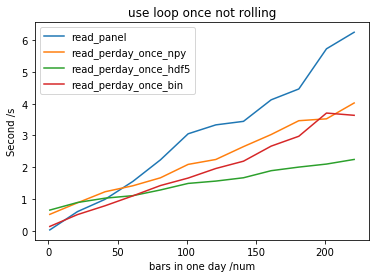

In [101]:
ax = pd.DataFrame([list_once_panel,list_perday_once_npy,list_perday_once_hdf5,list_perday_once_bin]
                  ,index=['read_panel','read_perday_once_npy','read_perday_once_hdf5','read_perday_once_bin']
                  ,columns=range(1,241,20)).T.plot()
ax.set_title("use loop once not rolling")
ax.set_ylabel("Second /s")
ax.set_xlabel("bars in one day /num")

### 每天一个矩阵，进行矩阵的读取、追加、删除（切片），追加+读取性能

In [106]:
N = 1

list_panel = []
list_perday_rolling_npy = []
list_perday_rolling_hdf5 = []

for N in range(1,241,20):
    t0 = read_panel()
    list_panel.append(t0)
    t1 = read_perday_rolling_npy(5)
    list_perday_rolling_npy.append(t1)
    t2 = read_perday_rolling_hdf5(5)
    list_perday_rolling_hdf5.append(t2)


Text(0.5,0,'bars in one day /num')

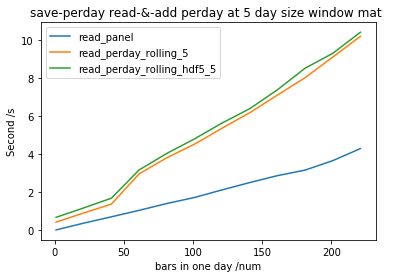

In [151]:
ax = pd.DataFrame([list_panel,list_perday_rolling_npy,list_perday_rolling_hdf5]
                  ,index=['read_panel','read_perday_rolling_5','read_perday_rolling_hdf5_5'],columns=range(1,241,20)).T.plot()
ax.set_title("save-perday read-&-add perday at 5 day size window mat ")
ax.set_ylabel("Second /s")
ax.set_xlabel("bars in one day /num")

### 每5天一个矩阵，进行矩阵的读取、追加、删除（切片），追加+读取性能

In [146]:
list_chunktest_panel = []
list_chunktest_rolling_npy = []
list_chunktest_rolling_hdf5 = []

for N in range(1,241,20):
    t0 = read_panel()
    list_chunktest_panel.append(t0)
    t1 = read_perday_chunck_rolling_npy(5,chunk_days=5)
    list_chunktest_rolling_npy.append(t1)
    t2 = read_perday_chunck_rolling_hdf5(5,chunk_days=5)
    list_chunktest_rolling_hdf5.append(t2)
    print (N,t0,t1,t2)


1 0.03253399999994144 0.1263969999999972 0.15317500000037398
21 0.40769300000010844 0.5993769999995493 0.6406539999998131
41 0.76171499999964 1.1473269999996774 1.199123999999756
61 1.130645999999615 2.7738460000000487 2.7762629999997444
81 1.475706999999602 3.429579000000558 3.5255719999995563
101 1.8063689999999042 4.2881680000000415 4.512560000000121
121 2.2122150000004694 5.2144700000008015 5.283934000000045
141 2.5845479999998133 6.481300000000374 6.494730000000345
161 2.8852799999995113 7.1649639999996 7.365882000000056
181 3.1383139999998093 8.056587000000036 8.250543000000107
201 3.568119999999908 9.068484000000353 9.647065000000111
221 4.410401999999522 10.504062999999405 10.404184999999416


Text(0.5,0,'bars in one day /num')

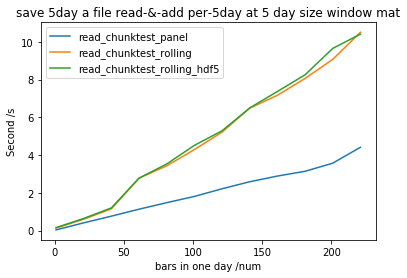

In [149]:
ax = pd.DataFrame([list_chunktest_panel,list_chunktest_rolling_npy,list_chunktest_rolling_hdf5]
                  ,index=['read_chunktest_panel','read_chunktest_rolling','read_chunktest_rolling_hdf5']
                  ,columns=range(1,241,20)).T.plot()
ax.set_title("save 5day a file read-&-add per-5day at 5 day size window mat")
ax.set_ylabel("Second /s")
ax.set_xlabel("bars in one day /num")

In [79]:
pd.DataFrame([list_panel,list_rolling],index=['read_panel','read_perday_rolling_5'],columns=range(1,241,20)).T

,read_panel,read_perday_rolling_5
1,0.024736,0.773545
21,0.711214,1.798121
41,1.036705,2.767668
61,2.033866,4.650752
81,2.366730,6.289283
101,3.348187,7.058866
121,3.986485,8.148600
141,4.137142,10.462075
161,4.991292,10.303240
181,5.759163,11.764379


make data 1-time 1280-date 3000-ticker 0.510000/s
make data 1-time 1280-date 3000-ticker 0.100000/s
make data 21-time 1280-date 3000-ticker 1.710000/s
make data 21-time 1280-date 3000-ticker 0.930000/s
make data 41-time 1280-date 3000-ticker 3.300000/s
make data 41-time 1280-date 3000-ticker 1.450000/s
make data 61-time 1280-date 3000-ticker 4.540000/s
make data 61-time 1280-date 3000-ticker 2.910000/s
make data 81-time 1280-date 3000-ticker 6.210000/s
make data 81-time 1280-date 3000-ticker 3.510000/s
make data 101-time 1280-date 3000-ticker 7.290000/s
make data 101-time 1280-date 3000-ticker 3.850000/s
make data 121-time 1280-date 3000-ticker 9.260000/s
make data 121-time 1280-date 3000-ticker 6.130000/s
make data 141-time 1280-date 3000-ticker 11.190000/s
make data 141-time 1280-date 3000-ticker 6.430000/s
make data 161-time 1280-date 3000-ticker 9.830000/s
make data 161-time 1280-date 3000-ticker 7.010000/s
make data 181-time 1280-date 3000-ticker 11.780000/s
make data 181-time 128

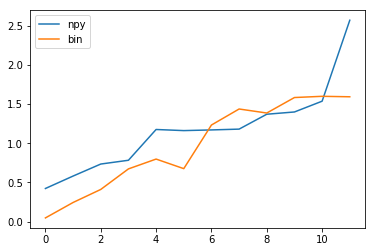

In [52]:
list_npy = []
list_bin = []

for N in range(1,241,20):
    t2 = read_perday_once_npy()
    list_npy.append(t2)
    t1 = read_perday_once_bin()
    list_bin.append(t1)
import pandas as pd
pd.DataFrame([list_npy,list_bin],index=['npy','bin']).T.plot()

In [25]:
list_rolling

[0.41313299999998776,
 0.9447169999999971,
 1.4452359999999942,
 3.1513060000000053,
 3.8919400000000053,
 4.612633999999986,
 5.435126999999994,
 6.409808999999996,
 7.30183199999999,
 8.161648000000014,
 9.20955600000002,
 10.514448999999956]

In [26]:
list_panel

[0.011793000000011489,
 0.4351959999999906,
 0.8431609999999807,
 1.2760729999999967,
 1.621093000000002,
 1.9469859999999812,
 2.3309130000000096,
 2.7320679999999697,
 3.1685259999999857,
 3.425459999999987,
 3.928953999999976,
 4.683531000000016]

In [35]:
pd.DataFrame([list_rolling,list_panel],index=['rolling','panel']).T

,rolling,panel
0,0.413133,0.011793
1,0.944717,0.435196
2,1.445236,0.843161
3,3.151306,1.276073
4,3.891940,1.621093
5,4.612634,1.946986
6,5.435127,2.330913
7,6.409809,2.732068
8,7.301832,3.168526
9,8.161648,3.425460
